## 1. 数据处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 为了使matplotlib图形能够内联显示
# %matplotlib inline
# # 导入词云库
# from wordcloud import WordCloud,ImageColorGenerator
# 读取候选人信息，由于原始数据没有表头，需要添加表头
candidates = pd.read_csv("weball20.txt", sep = '|',names=['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD','CAND_PTY_AFFILIATION','TTL_RECEIPTS',
                                                          'TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB',
                                                          'CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY',
                                                          'TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION'
                                                          ,'GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB',
                                                          'CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS'])
# 读取候选人和委员会的信息
ccl = pd.read_csv("ccl.txt", sep = '|',names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID'])


### 1.1 关联多表

In [2]:
#委员会和候选人关联
ccl = pd.merge(ccl,candidates)
ccl = pd.DataFrame(ccl, columns=[ 'CMTE_ID','CAND_ID', 'CAND_NAME','CAND_PTY_AFFILIATION'])
ccl

,CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00697789,H0AL01055,"CARL, JERRY LEE, JR",REP
1,C00701557,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP
2,C00701409,H0AL01071,"PRINGLE, CHRISTOPHER PAUL",REP
3,C00703066,H0AL01089,"HIGHTOWER, BILL",REP
4,C00708867,H0AL01097,"AVERHART, JAMES",DEM
...,...,...,...,...
4356,C00674770,S8WV00143,"MORRISEY, PATRICK MR",REP
4357,C00651075,S8WV00143,"MORRISEY, PATRICK MR",REP
4358,C00689471,S8WV00143,"MORRISEY, PATRICK MR",REP
4359,C00710889,S8WV00143,"MORRISEY, PATRICK MR",REP


In [ ]:
# 读取个人捐赠数据，由于原始数据没有表头，需要添加表头
itcont = pd.read_csv('itcont_2020_20200722_20200820.txt', sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',
                                                                                  'IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
                                                                                  'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
                                                                                  'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD',
                                                                                  'MEMO_TEXT','SUB_ID'])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,15,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
c_itcont = pd.merge(ccl,itcont)
c_itcont = pd.DataFrame(c_itcont, columns=[ 'CAND_NAME','NAME', 'STATE','EMPLOYER','OCCUPATION',
                                           'TRANSACTION_AMT', 'TRANSACTION_DT','CAND_PTY_AFFILIATION'])
"""
CAND_NAME – 接受捐赠的候选人姓名
NAME – 捐赠人姓名
STATE – 捐赠人所在州
EMPLOYER – 捐赠人所在公司
OCCUPATION – 捐赠人职业
TRANSACTION_AMT – 捐赠数额（美元）
TRANSACTION_DT – 收到捐款的日期
CAND_PTY_AFFILIATION – 候选人党派
"""

'\nCAND_NAME – 接受捐赠的候选人姓名\nNAME – 捐赠人姓名\nSTATE – 捐赠人所在州\nEMPLOYER – 捐赠人所在公司\nOCCUPATION – 捐赠人职业\nTRANSACTION_AMT – 捐赠数额（美元）\nTRANSACTION_DT – 收到捐款的日期\nCAND_PTY_AFFILIATION – 候选人党派\n'

### 1.2 查看基本信息 

In [5]:
c_itcont.head()

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020,REP
3,"WOOD, DANIEL","HOPKINS, RICHARD",AZ,POWERS-LEAVITT,INSURANCE AGENT,300,8102020,REP
4,"WOOD, DANIEL","PENDLETON, DIANE",AZ,UNEMPLOYED,NaN,500,8072020,REP


In [6]:
c_itcont.info()
#1. 由上表可知，SATE,EMPLOYER,OCCUPATION数据均有缺失，因此后续对SATE,EMPLOYER,OCCUPATION缺失值进行处理。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756160 non-null  object
 3   EMPLOYER              737413 non-null  object
 4   OCCUPATION            741294 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  int64 
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(2), object(6)
memory usage: 51.9+ MB


In [7]:
c_itcont.shape

(756205, 8)

In [8]:
c_itcont.isnull().mean()
# 'EMPLOYER'缺失量最大

CAND_NAME               0.000000
NAME                    0.000000
STATE                   0.000060
EMPLOYER                0.024850
OCCUPATION              0.019718
TRANSACTION_AMT         0.000000
TRANSACTION_DT          0.000000
CAND_PTY_AFFILIATION    0.000000
dtype: float64

In [9]:
print(c_itcont['EMPLOYER'].value_counts())
print(c_itcont['OCCUPATION'].value_counts())
# 2.OCCUPATION和EMPLOYER的对应数据有矛盾和重复，对其进行口径统一
# 3.对EMPLOYER(雇主)进行分析，部分职业一致(如self，self-occupation，self occupation)，由于命名差异，导致拆分统计，后续需要对该类数据进行合并。

NOT EMPLOYED                227547
RETIRED                     147714
SELF-EMPLOYED                50797
SELF                          6109
SELF EMPLOYED                 5120
                             ...  
CLARK NUBER                      1
SWITCHBACK TRAVEL LLC            1
THE DAVIS GROUP                  1
LANDSCAPE STRUCTURES             1
RALEIGH ARCHITECTURE CO.         1
Name: EMPLOYER, Length: 93604, dtype: int64
NOT EMPLOYED                         224109
RETIRED                              151834
ATTORNEY                              19666
PHYSICIAN                             14033
CONSULTANT                             8333
                                      ...  
PLATFORM ARCHITECT                        1
RETIRED SECONDARY TEACHER                 1
TRIBAL COLLEGE EXEC. DIRECTOR             1
CLINICAL SOCIAL WORKER AND EDITOR         1
FARMER/INVESTOR                           1
Name: OCCUPATION, Length: 26497, dtype: int64


In [10]:
c_itcont[c_itcont['EMPLOYER']=='NOT EMPLOYED'][['EMPLOYER','OCCUPATION']].value_counts()
# 2.EMPLOYER和OCCUPATION数据矛盾，e.g. EMPLOYER中NOT EMPOLYER涵盖了多种OCCUPATION,需要统一OCCUPATION

EMPLOYER      OCCUPATION                         
NOT EMPLOYED  NOT EMPLOYED                           220903
              RETIRED                                  4765
              SELF EMPLOYED                             161
              HOMEMAKER                                 121
              SELF-EMPLOYED                              98
                                                      ...  
              REGISTERED NURSE/STUDENT                    1
              FORMER DIRECTOR OF CLIENT RELATIONS         1
              FORMER EDITORIAL ASSISTANT                  1
              MIDWIFE                                     1
              ACCOUNT MANAGER                             1
Length: 287, dtype: int64

#### 通过数据统计发现的问题：
1. 由上表可知，SATE,EMPLOYER,OCCUPATION数据均有缺失，因此后续对SATE,EMPLOYER,OCCUPATION缺失值进行处理。
2. 对EMPLOYER(职业)进行分析，'NOT EMPLOYED'是EMPLOYER列出现频次最大的，共227547次，其次是'RETIRED'(退休)，共147714次；而对OCCUPATION(职业)进行分析，'NOT EMPLOYED'是OCCUPATION列出现频次最大的，共224109次，其次是'RETIRED'(退休)，共151834次；OCCUPATION和EMPLOYER的对应数据有矛盾和重复，对其进行口径统一
3. 对EMPLOYER(雇主)进行分析，部分职业一致(如self，self-occupation，self occupation)，由于命名差异，导致拆分统计，后续需要对该类数据进行合并。


## 2. 数据清洗

### 2.1 填充空值

In [11]:
# 1. 空值处理
c_itcont['STATE'].fillna(value='NOT PROVIDED',inplace=True)
c_itcont['EMPLOYER'].fillna(value='NOT PROVIDED',inplace=True)
c_itcont['OCCUPATION'].fillna(value='NOT PROVIDED',inplace=True)
c_itcont
    

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020,REP
3,"WOOD, DANIEL","HOPKINS, RICHARD",AZ,POWERS-LEAVITT,INSURANCE AGENT,300,8102020,REP
4,"WOOD, DANIEL","PENDLETON, DIANE",AZ,UNEMPLOYED,NOT PROVIDED,500,8072020,REP
...,...,...,...,...,...,...,...,...
756200,"MORRISEY, PATRICK MR","HOWELL, TRESA MRS.",WV,NOT PROVIDED,NOT PROVIDED,500,8152020,REP
756201,"MORRISEY, PATRICK MR","LEWIS, VERONICA MS.",WV,NOT PROVIDED,NOT PROVIDED,200,8022020,REP
756202,"MORRISEY, PATRICK MR","MILLER, MATT F MR.",WV,DUTCH MILLER CHEVROLET,AUTO DEALER,2500,8032020,REP
756203,"MORRISEY, PATRICK MR","POTTER, MELODY L MRS.",WV,TRI-STAR COAL SALES CO.,BUSINESS OWNER,100,8032020,REP


### 2.2 统一职业口径

In [12]:
# 3. 相同employer（雇主）类型合并
s1 = c_itcont['EMPLOYER']
cons1 = s1=='SELF-EMPLOYED'
cons2 = s1=='SELF'
c_itcont['EMPLOYER'] = s1.mask(cons1|cons2,'SELF EMPLOYED')  #对满足条件的行进行替换
c_itcont['EMPLOYER'].value_counts()

NOT EMPLOYED                227547
RETIRED                     147714
SELF EMPLOYED                62026
NOT PROVIDED                 18792
NONE                          2590
                             ...  
SWITCHBACK TRAVEL LLC            1
THE DAVIS GROUP                  1
LANDSCAPE STRUCTURES             1
BIOSTAT INC.                     1
RALEIGH ARCHITECTURE CO.         1
Name: EMPLOYER, Length: 93603, dtype: int64

In [13]:
# 2.EMPLOYER和OCCUPATION数据矛盾，e.g. EMPLOYER中NOT EMPOLYER涵盖了多种OCCUPATION,需要统一OCCUPATION
# 除occupation为retired的外，所有employer为not employed的数据，occupation统一为not employed
c_itcont['OCCUPATION']=c_itcont['OCCUPATION'].mask((c_itcont['EMPLOYER']=='NOT EMPLOYED') & (c_itcont['OCCUPATION']!='RETIRED'),'NOT EMPLOYED')
c_itcont['OCCUPATION']=c_itcont['OCCUPATION'].mask(c_itcont['EMPLOYER']=='RETIRED','RETIRED')

In [14]:
# 2. 处理后验证
print(c_itcont[c_itcont['EMPLOYER']=='NOT EMPLOYED'][['EMPLOYER','OCCUPATION']].value_counts())
print(c_itcont[c_itcont['EMPLOYER']=='RETIRED'][['EMPLOYER','OCCUPATION']].value_counts())

EMPLOYER      OCCUPATION  
NOT EMPLOYED  NOT EMPLOYED    222782
              RETIRED           4765
dtype: int64
EMPLOYER  OCCUPATION
RETIRED   RETIRED       147714
dtype: int64


In [15]:
# 处理后EMPLOYER和OCCUPATION的数据概览
print(c_itcont['EMPLOYER'].value_counts())
print(c_itcont['OCCUPATION'].value_counts())

NOT EMPLOYED                227547
RETIRED                     147714
SELF EMPLOYED                62026
NOT PROVIDED                 18792
NONE                          2590
                             ...  
SWITCHBACK TRAVEL LLC            1
THE DAVIS GROUP                  1
LANDSCAPE STRUCTURES             1
BIOSTAT INC.                     1
RALEIGH ARCHITECTURE CO.         1
Name: EMPLOYER, Length: 93603, dtype: int64
NOT EMPLOYED                 225807
RETIRED                      156591
ATTORNEY                      19297
NOT PROVIDED                  14816
PHYSICIAN                     13864
                              ...  
TRANSACTIONS ANALYST              1
GALLERY COORDINATOR               1
REAL ESTATE TITLE AGENT           1
AUTO COLLISION SHOP OWNER         1
FARMER/INVESTOR                   1
Name: OCCUPATION, Length: 26069, dtype: int64


### 2.3 修改日期类型

In [16]:
# ‘日期’列数据类型改为str，格式改为'2020822'常见形式
c_itcont['TRANSACTION_DT']=c_itcont['TRANSACTION_DT'].astype(str)
c_itcont['TRANSACTION_DT']=[ i[3:]+i[0]+i[1:3] for i in c_itcont['TRANSACTION_DT']]

### 2.4 验证数据

In [17]:
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756205 non-null  object
 3   EMPLOYER              756205 non-null  object
 4   OCCUPATION            756205 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  object
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(1), object(7)
memory usage: 51.9+ MB


In [18]:
c_itcont['CAND_NAME'].describe()

count                 756205
unique                   312
top       BIDEN, JOSEPH R JR
freq                  507816
Name: CAND_NAME, dtype: object

## 3. 数据分析

### 3.1 党派和候选人角度

In [19]:
# 计算每个党派下总统候选人的所获得的捐款总额，然后排序，取前十位
dk = c_itcont.groupby(['CAND_PTY_AFFILIATION','CAND_NAME']).sum().sort_values('TRANSACTION_AMT',ascending=False).head(10)
dk['TRANS_CAND_PERCERNT']= (dk.TRANSACTION_AMT / dk.TRANSACTION_AMT.sum())
dk['TRANS_CAND_PERCERNT']=dk['TRANS_CAND_PERCERNT'].apply(lambda x: format(x,'.2%'))
dk

TRANSACTION_AMT  \
CAND_PTY_AFFILIATION CAND_NAME                                           
DEM                  BIDEN, JOSEPH R JR                       68111142   
REP                  TRUMP, DONALD J.                         16594982   
                     SULLIVAN, DAN                             9912465   
                     JACOBS, CHRISTOPHER L.                    6939209   
DEM                  BLOOMBERG, MICHAEL R.                     3451916   
                     MARKEY, EDWARD J. SEN.                     606832   
                     SHAHEEN, JEANNE                            505446   
                     KENNEDY, JOSEPH P III                      467738   
REP                  CORNYN, JOHN SEN                           345959   
                     FIGLESTHALER, WILLIAM MATTHEW MD           258221   

                                                      TRANS_CAND_PERCERNT  
CAND_PTY_AFFILIATION CAND_NAME                                             
DEM                  BIDEN, JOSEPH R JR                            63.54%  
REP                  TRUMP, DONALD J.                              15.48%  
                     SULLIVAN, DAN                                  9.25%  
                     JACOBS, CHRISTOPHER L.                         6.47%  
DEM                  BLOOMBERG, MICHAEL R.                          3.22%  
                     MARKEY, EDWARD J. SEN.                         0.57%  
                     SHAHEEN, JEANNE                                0.47%  
                     KENNEDY, JOSEPH P III                          0.44%  
REP                  CORNYN, JOHN SEN                               0.32%  
                     FIGLESTHALER, WILLIAM MATTHEW MD               0.24%

In [20]:
# 计算从2021.7.22起 拜登和特朗普所获累积捐款额
dl= c_itcont[['CAND_NAME','TRANSACTION_DT','TRANSACTION_AMT']].loc[c_itcont.CAND_NAME.isin(['BIDEN, JOSEPH R JR','TRUMP, DONALD J.'])]
dl = dl.groupby(['CAND_NAME','TRANSACTION_DT']).sum()
dl = dl.unstack(0)
dl = dl.cumsum()
dl.head()

TRANSACTION_AMT                 
CAND_NAME      BIDEN, JOSEPH R JR TRUMP, DONALD J.
TRANSACTION_DT                                    
2020722                    888622           330603
2020723                   1852227           554920
2020724                   3024292           828209
2020725                   3943847          1035861
2020726                   5052629          1529042

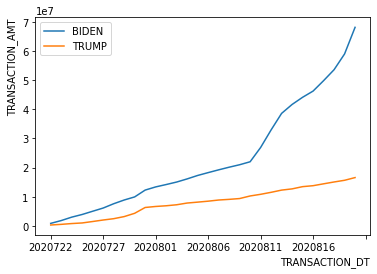

In [21]:
# 累积捐款额作图
dl.plot()
plt.xlabel('TRANSACTION_DT',loc='right')
plt.ylabel('TRANSACTION_AMT',loc='top')
plt.legend(['BIDEN','TRUMP'])

#### 从候选人和党派角度分析，可以看出:
1. DEM(民主党)的BIDEN和REP(共和党)的TRUMP所获捐款额分别位列第一、二位次，占总捐款额的63.54%，15.48%，且与排名之后的候选人差距较大
2. 拜登获得的全款总额在2020.7.22-2020.8.20这一个月的统计周期内，达到特朗普所获捐款总额的4倍之多
3. 趋势图表明从2020.7.22起两位候选人的总捐款数均以较为平缓的速率增长，拜登获得的捐款总额始终高于特朗普；2020.8.11形成拐点，拜登的捐款额增长率进一步增大，迅速和特兰普拉大差距

### 3.2 捐款人角度

In [ ]:
import numpy as np
# 查看不同职业的人捐款的总额及占比
df = c_itcont.groupby('OCCUPATION').sum().sort_values('TRANSACTION_AMT',ascending=False)
df['TRANSACTION_PERCENT']=df.TRANSACTION_AMT / df.TRANSACTION_AMT.sum()
df['TRANSACTION_PERCENT'] = df['TRANSACTION_PERCENT'].apply(lambda x: format(x,'.2%'))
# 查看每个职业捐款人的数量及占比
df['PEOPLE_AMT'] = c_itcont.OCCUPATION.value_counts()
df['PEOPLE_PERCENT']=df.PEOPLE_AMT / df.PEOPLE_AMT.sum()
df['PEOPLE_PERCENT'] = df['PEOPLE_PERCENT'].apply(lambda x: format(x,'.2%'))
# 计算每个职业的人均捐款
df['人均捐款'] = round(df['TRANSACTION_AMT']/df['PEOPLE_AMT'],1)
df.head(10)

,TRANSACTION_AMT,TRANSACTION_PERCENT,PEOPLE_AMT,PEOPLE_PERCENT,人均捐款
OCCUPATION,,,,,
NOT EMPLOYED,24676228,21.69%,225807,29.86%,109.3
RETIRED,19444347,17.09%,156591,20.71%,124.2
NOT PROVIDED,5078593,4.46%,14816,1.96%,342.8
ATTORNEY,4345104,3.82%,19297,2.55%,225.2
FOUNDER,3519109,3.09%,197,0.03%,17863.5
PHYSICIAN,3251369,2.86%,13864,1.83%,234.5
CONSULTANT,1636481,1.44%,8299,1.10%,197.2
LAWYER,1533666,1.35%,6328,0.84%,242.4
EXECUTIVE,1462990,1.29%,3052,0.40%,479.4


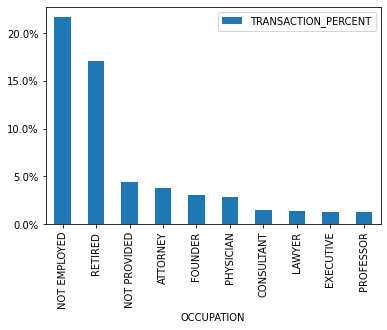

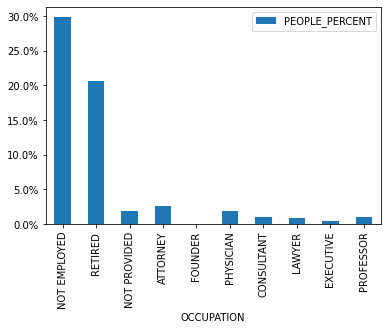

In [ ]:
from matplotlib.ticker import FormatStrFormatter
df['TRANSACTION_PERCENT']=df.TRANSACTION_AMT / df.TRANSACTION_AMT.sum() *100
occu_t_amt = pd.DataFrame(df[:10],columns=['TRANSACTION_PERCENT'])
occu_t_amt.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f%%'))
df['PEOPLE_PERCENT']=df.PEOPLE_AMT / df.PEOPLE_AMT.sum() *100
occu_p_amt = pd.DataFrame(df[:10],columns=['PEOPLE_PERCENT'])
occu_p_amt.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f%%'))
  
plt.show()

#### 从捐款人角度分析，可以看出:
1. 由于‘NOT EMPLOYED’和'RETIRED'的捐款人数相较于其他职业大了一个数量级，因此这两种职业（‘非就业’和‘退休’）的捐款人的捐款总额也较大，分别位列一,二位，分别占所有捐款数的37,17%,29.29%,仅这两部分已占越2/3的捐款数，
2. 在其他职业中，‘ATTORNEY’(律师)，‘FOUNDER(创始人)’，‘PHYSICIAN’(医生)捐款总额依次递减，这些高薪人才虽然人数较少，但捐款总金额也占据了很大的比例。
3. 其中创始人的人均捐款数在所有职业中最大，达到17863.5

### 3.3 州角度

In [ ]:
# 每个州获捐款的总额，然后排序，取前五位
dg = c_itcont.groupby('STATE').sum() 
dg['TRANSACTION_PERECENT'] = dg['TRANSACTION_AMT']/dg['TRANSACTION_AMT'].sum()
dg['TRANSACTION_PERECENT'] = dg['TRANSACTION_PERECENT'].apply(lambda x: format(x,'.2%'))
# 查看每个州捐款人的数量
dg['PEOPLE_AMOUNT'] = c_itcont.groupby('STATE')['NAME'].count()
dg['PEOPLE_PERECENT'] = dg['PEOPLE_AMOUNT']/dg['PEOPLE_AMOUNT'].sum()
dg['PEOPLE_PERECENT'] = dg['PEOPLE_PERECENT'].apply(lambda x: format(x,'.2%'))
# 计算每个州的人均捐款
dg['人均捐款'] = round(dg['TRANSACTION_AMT']/dg['PEOPLE_AMOUNT'],1)
dg = dg.sort_values('TRANSACTION_AMT',ascending = False)
dg.head()

,TRANSACTION_AMT,TRANSACTION_PERECENT,PEOPLE_AMOUNT,PEOPLE_PERECENT,人均捐款
STATE,,,,,
CA,19999115,17.58%,127895,16.91%,156.4
NY,11468537,10.08%,49453,6.54%,231.9
FL,8128789,7.15%,54343,7.19%,149.6
TX,8101871,7.12%,54457,7.20%,148.8
MA,5187957,4.56%,29314,3.88%,177.0


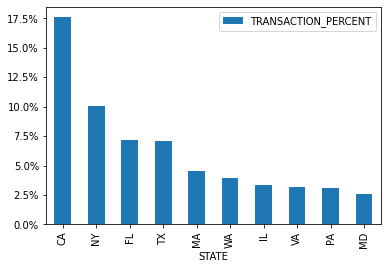

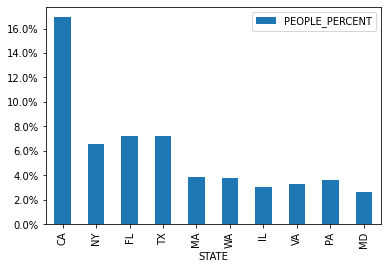

In [ ]:
dg['TRANSACTION_PERCENT'] = (dg.TRANSACTION_AMT/dg.TRANSACTION_AMT.sum()) * 100
st_t_amt = pd.DataFrame(dg[:10],columns=['TRANSACTION_PERCENT'])
st_t_amt.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f%%'))

dg['PEOPLE_PERCENT'] = (dg.PEOPLE_AMOUNT/dg.PEOPLE_AMOUNT.sum()) * 100
st_p_amt = pd.DataFrame(dg[:10],columns=['PEOPLE_PERCENT'])
st_p_amt.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f%%'))

plt.show()

In [ ]:
# 不同state的occupation分布
cond = 'OCCUPATION in ["ATTORNEY","FOUNDER","PHYSICIAN","CONSULTANT","LAWYER","PROFESSOR","EXECUTIVE"] and STATE in ["CA","NY","FL","TX"]'
dh = c_itcont.query(cond)
dh = dh.groupby(['STATE','OCCUPATION'])['NAME'].count()
dh = dh.unstack().head()
dh = dh.T
dh

STATE,CA,FL,NY,TX
OCCUPATION,,,,
ATTORNEY,3432,1077,2082,1370
CONSULTANT,1369,444,573,452
EXECUTIVE,639,220,303,200
FOUNDER,64,12,22,5
LAWYER,1007,327,904,325
PHYSICIAN,1814,918,927,883
PROFESSOR,1174,304,851,387


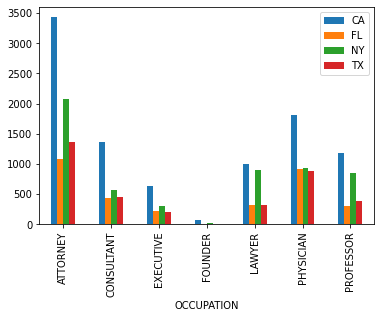

In [ ]:
dh.plot(kind='bar')
plt.legend(['CA','FL','NY','TX'])

array([<AxesSubplot:ylabel='TRANSACTION_AMT'>], dtype=object)

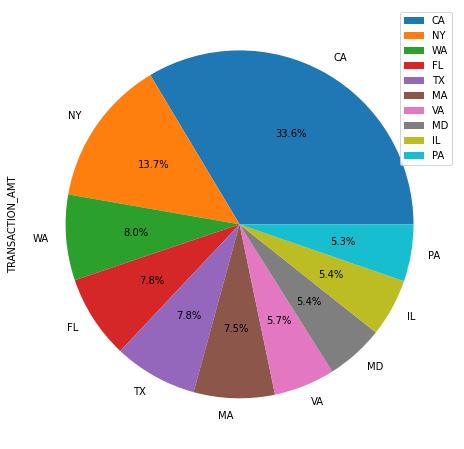

In [ ]:
# 从所有数据中取出支持拜登的数据
biden = c_itcont[c_itcont['CAND_NAME']=='BIDEN, JOSEPH R JR']
# 统计各州对拜登的捐款总数
biden_state = biden.groupby('STATE').sum().sort_values("TRANSACTION_AMT", ascending=False).head(10)
biden_state
# 饼图可视化各州捐款数据占比
biden_state.plot(kind='pie',figsize=(8, 8),subplots=True,autopct = '%0.1f%%' )

参数X：
a. 如果 sum(X) ≤ 1，X 中的值直接指定饼图扇区的面积。如果 sum(X) < 1，pie 仅绘制部分饼图。
b. 如果 sum(X) > 1，则 pie 通过 X/sum(X) 对值进行归一化，以确定饼图的每个扇区的面积。
参数autopct，展示比数值，可取值：
a. %d%%：整数百分比;
b. %0.1f：一位小数；
c. %0.1f%%：一位小数百分比；
d. %0.2f%%：两位小数百分比
参数 labels，在颜色块旁边展示细节内容
参数explode，偏移扇区：使用0/1标示需要偏移的扇区，要求长度和X一致，即X所有元素都要进行标示，且顺序要对应

#### 从州角度分析，可以看出：
1. CA的捐款总额和捐款人数都是遥遥领先，独为第一阶梯，第二阶梯包括NY,FL,TX和后面其他州也形成一定差距，可见其经济水平较高；
2. CA,NY,FL,TX这些州内高薪人才的数量也非常多,其中人均捐款最多的职业“创始人”单在CA州就有64个人，约占创始人总人数的1/3
3. 饼图可以看出不同州对拜登捐款数的贡献占比，其中CA,NY的捐款比例较大，剩余州的捐款总数差距不大

## 4. 收获和思考


1. 数据分析时要根据业务逻辑对数据进行预处理，处理过程细致，且具体指标需要根据实际业务情况进行具体分析
2. 针对数据作图时，要根据分析的目标选择合适的图表类型，如展示曲线变化：折线图等；展示分布关系：小提琴图，箱体图等；展示相关关系：散点图、热力图等；展示排序信息：散点图等；展示组成关系：饼图等